# Linear Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the dataset
url = 'https://drive.google.com/uc?id=1uzFnx_iAOAIm8NsOIxkw7YJ_W8M-Lx-B'
data = pd.read_csv(url)

In [12]:
# Display the first five rows of the dataset
data.head(5)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Handling missing values

In [13]:
# Handle missing values
data.dropna(inplace=True)  #Remove rows with missing values

### Handling Outliers

In [ ]:
## Identify and handle outliers
# First, select only numeric columns for outlier detection
numeric_data = data.select_dtypes(include=[np.number])

# Calculate IQR on numeric columns
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
data = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

### Normalize data

In [ ]:
# Normalize the columns using .loc to avoid SettingWithCopyWarning
scaler = StandardScaler()
data.loc[:, ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
             'Freedom', 'Generosity', 'Trust (Government Corruption)']] = scaler.fit_transform(
    data[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Generosity', 'Trust (Government Corruption)']]
)

### Define the dependent and independent variables

In [26]:
#Independent variable
X = data[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
          'Freedom', 'Generosity', 'Trust (Government Corruption)']]

#Dependent variable
y = data['Happiness Score']

### Creating the Training Set and the Test Set

In [40]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
X_train

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
142,0.587177,-0.423164,-0.873314,-0.648353,-1.325328,-0.058917
22,0.543181,1.043251,0.366444,0.105229,-1.410465,-0.061584
47,0.047623,-0.031136,0.670030,0.493604,-0.915785,0.789615
94,0.087907,-0.845258,0.767291,-0.386581,-0.678772,-0.626060
38,1.945493,0.666821,0.385464,0.968277,-0.509019,1.701191
...,...,...,...,...,...,...
84,-1.034784,-0.377835,-1.454634,0.510946,-0.217157,0.108025
81,0.152003,0.198394,0.262137,-0.048791,-0.958136,0.329281
143,-2.137374,-0.977774,-1.464014,0.433148,-0.234862,0.492465
61,0.648496,-0.879129,0.658358,-1.061748,-1.444919,-1.108944


In [35]:
X_test

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
15,0.369948,0.946697,0.264860,0.526163,-0.652563,0.720632
66,0.993836,-0.473761,1.244131,-0.048037,0.741568,-0.658430
57,0.147081,-0.133335,0.408159,0.008444,-0.617154,-0.677464
36,0.991828,1.235899,1.087000,1.301817,2.573969,0.243567
80,-0.690929,-2.477056,-0.523432,-2.006365,1.004790,-0.134932
121,-1.803748,-1.682755,-0.843790,0.142380,0.193688,0.420815
70,0.442458,-0.088926,0.318808,1.007142,1.358270,-0.491730
112,0.202901,0.745184,-1.551290,-0.559725,-0.878293,-0.326485
14,1.506332,1.006244,0.977116,0.906930,1.563172,0.522896
138,-0.462068,-1.436708,-1.405917,0.006387,-0.842277,0.013219


In [36]:
y_train

142    3.896
22     6.810
47     5.975
94     4.959
38     6.295
       ...  
84     5.129
81     5.192
143    3.845
61     5.759
58     5.813
Name: Happiness Score, Length: 100, dtype: float64

In [37]:
y_test

15     6.983
66     5.689
57     5.824
36     6.302
80     5.194
121    4.512
70     5.477
112    4.642
14     7.119
138    3.989
18     6.937
88     5.098
120    4.514
63     5.716
107    4.715
6      7.378
122    4.507
105    4.786
34     6.411
59     5.791
73     5.399
113    4.633
116    4.565
78     5.253
26     6.670
44     5.995
Name: Happiness Score, dtype: float64

## Part 2 - Model Implementation

### Building the model

In [ ]:
#Build the model
model = LinearRegression()

LinearRegression()

### Traning the model

In [ ]:
#Train the model
model.fit(X_train, y_train)

LinearRegression()

### Making predictions

In [ ]:
#Make prediction
y_pred = model.predict(X_test)

In [43]:
#Show the prediction
y_pred

array([5.88082505, 5.83967668, 5.31580703, 6.80643618, 3.96838701,
       4.13107118, 5.74493585, 4.85438405, 6.69079834, 4.18008543,
       6.69963555, 5.52160715, 4.68037124, 5.51189   , 4.81840349,
       7.07558926, 3.90078275, 4.82315744, 5.99814794, 6.05651692,
       5.57804723, 4.25720928, 4.16020584, 5.6976627 , 6.12183756,
       5.85767858])

## Part 3 - Evaluation Metrics

### Evaluating the metrics

#### R-Squared

In [48]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 0.21559633639006698
R-squared: 0.7536856181426417


#### Adjusted R-Squred

In [49]:
# Number of observations and predictors
n = X_test.shape[0]  # Number of data points in the test set
p = X_test.shape[1]  # Number of predictors

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1)) / (n - p - 1)

print(f"Adjusted R-squared: {adjusted_r_squared}")

Adjusted R-squared: 0.6759021291350549


## Interpretation

                               Coefficient
Economy (GDP per Capita)          0.249006
Family                            0.313336
Health (Life Expectancy)          0.344104
Freedom                           0.151745
Generosity                        0.102022
Trust (Government Corruption)     0.104049


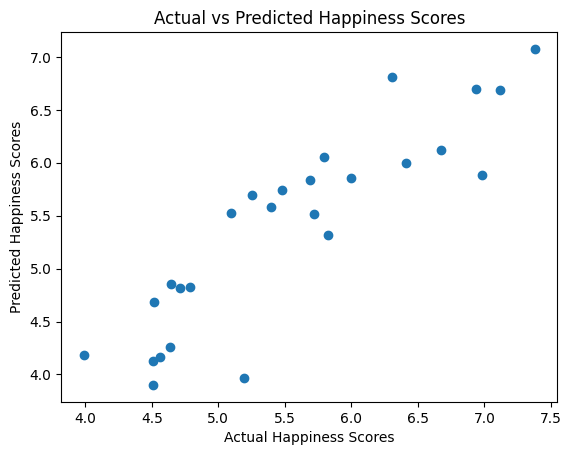

In [ ]:
# Interpretation
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Happiness Scores')
plt.ylabel('Predicted Happiness Scores')
plt.title('Actual vs Predicted Happiness Scores')
plt.show()